In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D

import cv2

image = mpimg.imread('image/Q.jfif')
data = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [2]:
image.shape

(231, 402, 3)

In [3]:
data.shape

(231, 402)

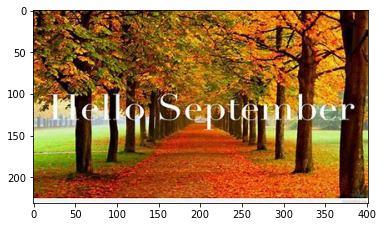

In [4]:
plt.imshow(image)

In [5]:
data = np.asarray(data)
data = data.reshape(1, image.shape[0], image.shape[1], 1)

In [6]:
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), #activation = 'relu', 
                 padding= 'same', input_shape=(image.shape[0], image.shape[1], 1)))

In [7]:
# define a vertical line detector
detector = [[[[-4]],[[0]],[[4]]],
            [[[-10]],[[0]],[[10]]],
            [[[-4]],[[0]],[[4]]]]

In [8]:
weights = [np.asarray(detector), np.asarray([0.0])]
# store the weights in the model
model.set_weights(weights)
# confirm they were stored
print(model.get_weights())

[array([[[[ -4.]],

        [[  0.]],

        [[  4.]]],


       [[[-10.]],

        [[  0.]],

        [[ 10.]]],


       [[[ -4.]],

        [[  0.]],

        [[  4.]]]], dtype=float32), array([0.], dtype=float32)]


In [9]:
# apply filter to input data
yhat = model.predict(data)

In [10]:
yhat.shape

(1, 231, 402, 1)

In [11]:
yhati = yhat.reshape(image.shape[0], image.shape[1])

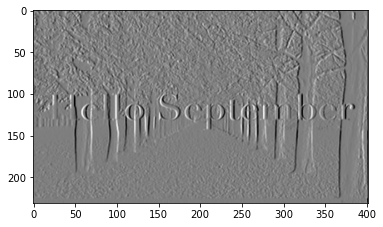

In [12]:
plt.imshow(yhati, cmap='gray')